In [ ]:
# Install simpletransformers if not already installed
!pip install simpletransformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.3/316.3 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.4/487.4 kB 29.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 98.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 83.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.6 MB/s eta 0:00:00
 

In [ ]:

# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from google.colab import drive  # Import for mounting Google Drive

# Mount Google Drive
drive.mount('/content/drive')

# Define the dataset path
file_path = '/content/drive/MyDrive/NLP/modified_balanced_job_dataset.csv'

# Load the dataset
data = pd.read_csv(file_path)

# Exploratory Data Analysis (EDA)
print("Dataset Information:")
print(data.info())  # Overview of data structure

print("\nClass Distribution:")
print(data['Relevance'].value_counts())  # Class distribution

# Encoding "Relevance" labels to numeric values (for model training)
label_mapping = {'Strong': 2, 'Medium': 1, 'Low': 0}
data['label'] = data['Relevance'].map(label_mapping)

# Split dataset into train and validation sets
train_data, val_data = train_test_split(data, test_size=0.2, random_state=42)

# Preparing the data in the correct format for SimpleTransformers
train_df = pd.DataFrame({
    'text': train_data['Description'],  # Adjust column name if needed
    'labels': train_data['label']
})

val_df = pd.DataFrame({
    'text': val_data['Description'],  # Adjust column name if needed
    'labels': val_data['label']
})

# Display first few rows to verify format
print("\nTraining Data Sample:")
print(train_df.head())

print("\nValidation Data Sample:")
print(val_df.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Relevance    1000 non-null   object
 1   Description  1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB
None

Class Distribution:
Relevance
Strong    334
Medium    333
Low       333
Name: count, dtype: int64

Training Data Sample:
                                                  text  labels
29   I have basic skills of TensorFlow with experie...       0
535  I have strong skills of Python with experience...       2
695  I have intermediate skills of Node.js with exp...       1
557  I have intermediate skills of SQL with experie...       1
836  I have strong skills of C++ with experience of...       2

Validation Data Sample:
          

In [ ]:
import re

# Define a function to clean text data
def clean_text(text):
    if isinstance(text, str):  # Ensure text is a string
        # Convert to lowercase
        text = text.lower()

        # Remove special characters, numbers, and extra spaces
        text = re.sub(r'[^a-z\s]', '', text)  # Keep only letters and spaces

        # Remove multiple spaces
        text = re.sub(r'\s+', ' ', text).strip()

    return text

# Apply the cleaning function to the dataset
train_df['text'] = train_df['text'].apply(clean_text)
val_df['text'] = val_df['text'].apply(clean_text)

# Display first few cleaned rows
print(train_df.head())
print(val_df.head())


                                                  text  labels
29   i have basic skills of tensorflow with experie...       0
535  i have strong skills of python with experience...       2
695  i have intermediate skills of nodejs with expe...       1
557  i have intermediate skills of sql with experie...       1
836  i have strong skills of c with experience of y...       2
                                                  text  labels
521  i have intermediate skills of javascript with ...       0
737  i have basic skills of java with experience of...       0
740  i have intermediate skills of tensorflow with ...       2
660  i have intermediate skills of javascript with ...       1
411  i have basic skills of nodejs with experience ...       0


In [ ]:
# Import the necessary library
from simpletransformers.classification import ClassificationModel

# Define number of labels based on unique classes in dataset
num_labels = 3  # 'Strong', 'Medium', 'Low'

# Create a BERT model for text classification
bert_model = ClassificationModel(
    'bert',
    'bert-base-uncased',
    num_labels=num_labels,
    use_cuda=True  # Set use_cuda=True if using a GPU
)

# Create a RoBERTa model for text classification
roberta_model = ClassificationModel(
    'roberta',
    'roberta-base',
    num_labels=num_labels,
    use_cuda=True  # Set use_cuda=True if using a GPU
)

print("BERT and RoBERTa models initialized successfully!")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

BERT and RoBERTa models initialized successfully!


In [ ]:
# Import necessary libraries
from simpletransformers.classification import ClassificationModel, ClassificationArgs

# Define the number of labels (for multi-class classification)
num_labels = 3  # Labels: 'Strong', 'Medium', 'Low'

# Set up model arguments with custom hyperparameters
from simpletransformers.classification import ClassificationModel, ClassificationArgs

# Define the number of labels (for multi-class classification)
num_labels = 3  # Labels: 'Strong', 'Medium', 'Low'

# Set up model arguments with custom hyperparameters
model_args = ClassificationArgs(
    num_train_epochs=3,       # Start with 3 epochs (can increase if needed)
    train_batch_size=8,       # Batch size of 8 (adjust based on memory)
    eval_batch_size=8,        # Same batch size for evaluation
    learning_rate=3e-5,       # Learning rate for fine-tuning
    max_seq_length=128,       # Truncate/pad sequences to 128 tokens
    weight_decay=0.01,        # Regularization to prevent overfitting
    warmup_ratio=0.1,         # 10% of total steps as warm-up
    logging_steps=50,         # Log training progress every 50 steps
    save_steps=200,           # Save model every 200 steps
    # The 'evaluation_strategy' argument has been removed in recent versions.
    # Use 'evaluate_during_training' and 'evaluate_during_training_steps' instead.
    evaluate_during_training=True,  # Evaluate during training
    evaluate_during_training_steps=50, # Evaluate every 50 steps
    save_best_model=True,     # Save the best model based on evaluation metric
    overwrite_output_dir=True # Ensure fresh training each run
)

# Train the BERT model with custom hyperparameters
bert_model = ClassificationModel(
    'bert',
    'bert-base-uncased',
    num_labels=num_labels,
    args=model_args,
    use_cuda=True  # Set to True if using a GPU
)

print("Training BERT model...")
bert_model.train_model(train_df, eval_df=val_df)

# Train the RoBERTa model with custom hyperparameters
roberta_model = ClassificationModel(
    'roberta',
    'roberta-base',
    num_labels=num_labels,
    args=model_args,
    use_cuda=True  # Set to True if using a GPU
)

print("Training RoBERTa model...")
# Pass the validation dataframe (val_df) to eval_df
roberta_model.train_model(train_df, eval_df=val_df)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Training BERT model...


  0%|          | 0/1 [00:00<?, ?it/s]

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:882: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = amp.GradScaler()


Running Epoch 1 of 3:   0%|          | 0/100 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:905: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


0it [00:00, ?it/s]

/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:1505: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:905: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


0it [00:00, ?it/s]

/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:1505: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


0it [00:00, ?it/s]

/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:1505: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


Running Epoch 2 of 3:   0%|          | 0/100 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:905: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


0it [00:00, ?it/s]

/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:1505: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:905: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


0it [00:00, ?it/s]

/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:1505: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


0it [00:00, ?it/s]

/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:1505: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


Running Epoch 3 of 3:   0%|          | 0/100 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:905: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


0it [00:00, ?it/s]

/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:1505: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:905: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


0it [00:00, ?it/s]

/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:1505: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


0it [00:00, ?it/s]

/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:1505: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Training RoBERTa model...


  0%|          | 0/1 [00:00<?, ?it/s]

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:882: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = amp.GradScaler()


Running Epoch 1 of 3:   0%|          | 0/100 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:905: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


0it [00:00, ?it/s]

/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:1505: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:905: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


0it [00:00, ?it/s]

/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:1505: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


0it [00:00, ?it/s]

/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:1505: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


Running Epoch 2 of 3:   0%|          | 0/100 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:905: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


0it [00:00, ?it/s]

/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:1505: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:905: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


0it [00:00, ?it/s]

/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:1505: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


0it [00:00, ?it/s]

/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:1505: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


Running Epoch 3 of 3:   0%|          | 0/100 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:905: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


0it [00:00, ?it/s]

/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:1505: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():
/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:905: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


0it [00:00, ?it/s]

/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:1505: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


0it [00:00, ?it/s]

/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:1505: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


(300,
 defaultdict(list,
             {'global_step': [50, 100, 100, 150, 200, 200, 250, 300, 300],
              'train_loss': [0.22479248046875,
               0.411041259765625,
               0.411041259765625,
               0.045085906982421875,
               1.0903377532958984,
               1.0903377532958984,
               0.9447860717773438,
               0.5160179138183594,
               0.5160179138183594],
              'mcc': [np.float64(0.8272013349942788),
               np.float64(0.8272013349942788),
               np.float64(0.8272013349942788),
               np.float64(0.8272013349942788),
               np.float64(0.8272013349942788),
               np.float64(0.8272013349942788),
               np.float64(0.8272013349942788),
               np.float64(0.8272013349942788),
               np.float64(0.8272013349942788)],
              'eval_loss': [0.468916015625,
               0.4833551025390625,
               0.4833551025390625,
               0.5055657196

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define metric functions
def accuracy(labels, preds):
    return accuracy_score(labels, preds)

def precision(labels, preds):
    return precision_score(labels, preds, average='weighted')

def recall(labels, preds):
    return recall_score(labels, preds, average='weighted')

def f1(labels, preds):
    return f1_score(labels, preds, average='weighted')

# Evaluate BERT model on validation data
result_bert, model_outputs_bert, wrong_predictions_bert = bert_model.eval_model(
    val_df,
    accuracy=accuracy,
    precision=precision,
    recall=recall,
    f1=f1
)

print("BERT Evaluation Results:")
print(result_bert)

# Evaluate RoBERTa model on validation data
result_roberta, model_outputs_roberta, wrong_predictions_roberta = roberta_model.eval_model(
    val_df,
    accuracy=accuracy,
    precision=precision,
    recall=recall,
    f1=f1
)

print("RoBERTa Evaluation Results:")
print(result_roberta)


0it [00:00, ?it/s]

Running Evaluation:   0%|          | 0/25 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:1505: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


BERT Evaluation Results:
{'mcc': np.float64(0.8272013349942788), 'accuracy': 0.885, 'precision': 0.8865621707245114, 'recall': 0.885, 'f1': 0.8846653050108932, 'eval_loss': 0.4653584289550781}


0it [00:00, ?it/s]

Running Evaluation:   0%|          | 0/25 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/simpletransformers/classification/classification_model.py:1505: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast():


RoBERTa Evaluation Results:
{'mcc': np.float64(0.8272013349942788), 'accuracy': 0.885, 'precision': 0.8865621707245114, 'recall': 0.885, 'f1': 0.8846653050108932, 'eval_loss': 0.45564544677734375}


In [ ]:
  # Save the trained BERT model
  bert_model.save_model('/content/bert_best_model')

  # Save the trained RoBERTa model
  roberta_model.save_model('/content/roberta_best_model')

  print("Models saved successfully!")


Models saved successfully!


In [ ]:
# Save BERT model properly
bert_model.save_model('/content/bert_best_model')

# Save RoBERTa model properly
roberta_model.save_model('/content/roberta_best_model')


In [ ]:
import os

print("BERT Model Directory Contents:", os.listdir('/content/bert_best_model'))
print("RoBERTa Model Directory Contents:", os.listdir('/content/roberta_best_model'))


BERT Model Directory Contents: []
RoBERTa Model Directory Contents: []


In [ ]:
# Import necessary libraries
from transformers import BertForSequenceClassification, RobertaForSequenceClassification

# Manually save BERT model
bert_model.model.save_pretrained('/content/bert_best_model')
bert_model.tokenizer.save_pretrained('/content/bert_best_model')

# Manually save RoBERTa model
roberta_model.model.save_pretrained('/content/roberta_best_model')
roberta_model.tokenizer.save_pretrained('/content/roberta_best_model')


('/content/roberta_best_model/tokenizer_config.json',
 '/content/roberta_best_model/special_tokens_map.json',
 '/content/roberta_best_model/vocab.json',
 '/content/roberta_best_model/merges.txt',
 '/content/roberta_best_model/added_tokens.json',
 '/content/roberta_best_model/tokenizer.json')

In [ ]:
import os

print("BERT Model Directory Contents:", os.listdir('/content/bert_best_model'))
print("RoBERTa Model Directory Contents:", os.listdir('/content/roberta_best_model'))


BERT Model Directory Contents: ['special_tokens_map.json', 'tokenizer_config.json', 'vocab.txt', 'model.safetensors', 'tokenizer.json', 'config.json']
RoBERTa Model Directory Contents: ['merges.txt', 'special_tokens_map.json', 'vocab.json', 'tokenizer_config.json', 'model.safetensors', 'tokenizer.json', 'config.json']


In [ ]:
# Load the saved BERT model
bert_model = ClassificationModel('bert', '/content/bert_best_model', use_cuda=False)

# Load the saved RoBERTa model
roberta_model = ClassificationModel('roberta', '/content/roberta_best_model', use_cuda=False)

print("✅ Models loaded successfully!")


✅ Models loaded successfully!


In [ ]:
# Sample real-world job descriptions (similar to dataset format)
real_world_text = [
    "I have intermideiate skills in Python with experience of 1 years in Finance and I have a Bachelor's in Computer Science and am proficient in SQL and AWS.",
    "I have soft skills of JavaScript with 3 years of experience in Gaming. I have a Master's in Computer Science and work with React and Node.js.",
    "I have decent skills in Docker with 1 year of experience in Retail. I have a PhD in Computer Science and use TensorFlow and SQL."
]

# Predict using BERT model
predictions_bert, _ = bert_model.predict(real_world_text)
print(f"BERT Predictions: {predictions_bert}")

# Predict using RoBERTa model
predictions_roberta, _ = roberta_model.predict(real_world_text)
print(f"RoBERTa Predictions: {predictions_roberta}")


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

BERT Predictions: [0 0 0]


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

RoBERTa Predictions: [1 1 2]


In [ ]:
!pip install matplotlib seaborn wordcloud scikit-learn


# **Exploratory Data Analysis (EDA)**

🎯 TARGET CLASS DISTRIBUTION


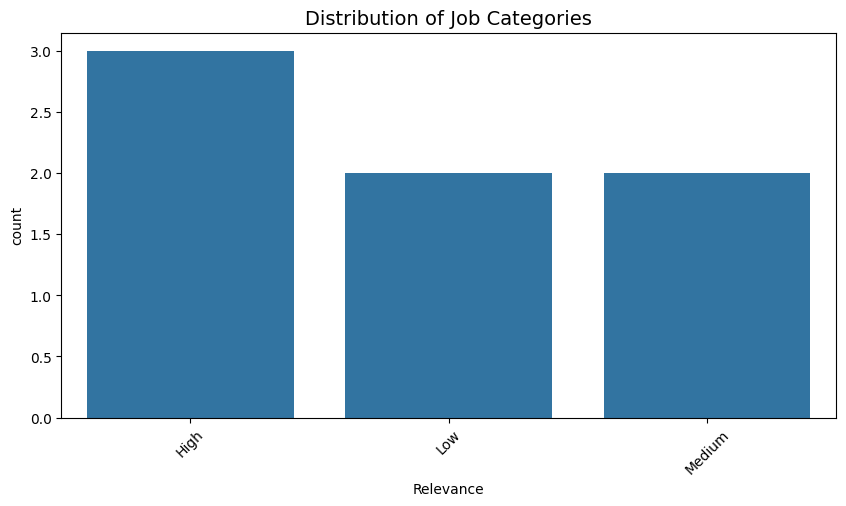


📏 TEXT LENGTH ANALYSIS


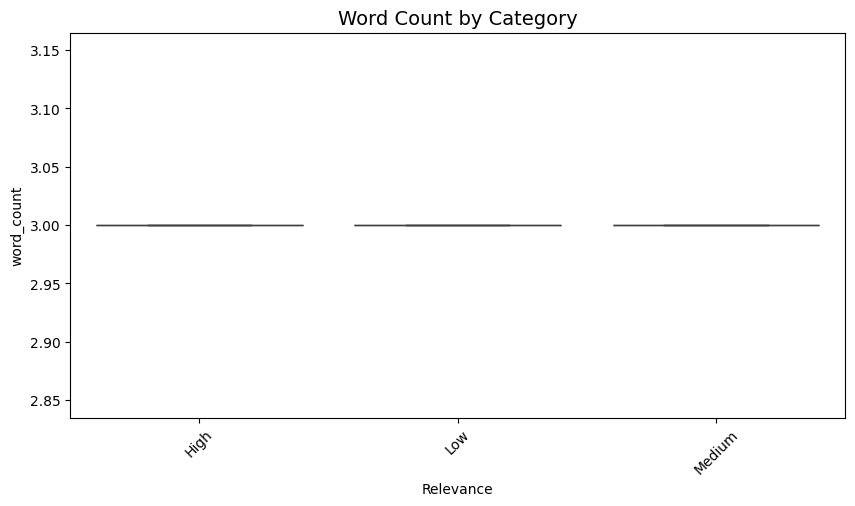

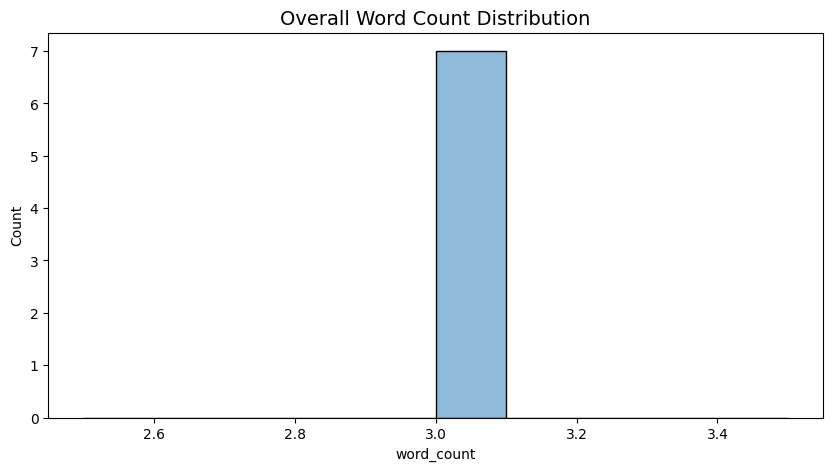


☁️ WORD CLOUD FOR 'High' CATEGORY


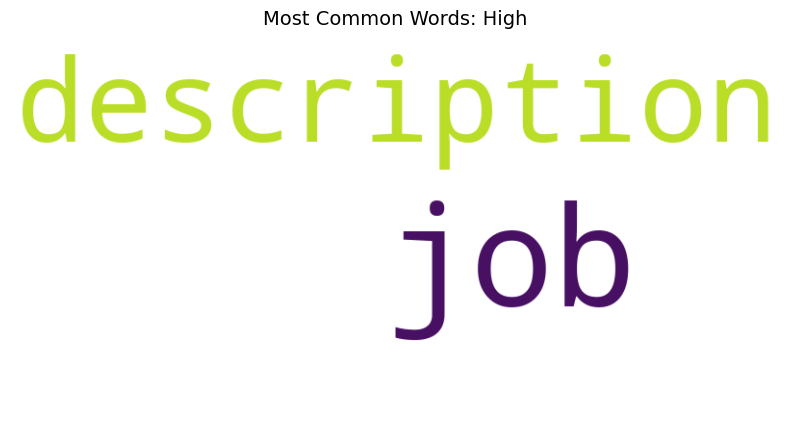


🔑 TOP KEYWORDS BY CATEGORY

Category: High
Top keywords: description, job

Category: Low
Top keywords: description, job

Category: Medium
Top keywords: description, job


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re

# Create a simple example DataFrame
data = {
    'Relevance': ['High', 'Low', 'Medium', 'High', 'Low', 'Medium', 'High'],
    'Description': ['Job 1 description', 'Job 2 description', 'Job 3 description',
                    'Job 4 description', 'Job 5 description', 'Job 6 description', 'Job 7 description']
}

df = pd.DataFrame(data)

# Define the column name for the target (Relevance)
target_col = 'Relevance'
text_col = 'Description'

# 1. Simple Target Distribution Plot
print("🎯 TARGET CLASS DISTRIBUTION")
print("="*50)
plt.figure(figsize=(10,5))
ax = sns.countplot(x=target_col, data=df,
                   order=df[target_col].value_counts().index)
plt.title("Distribution of Job Categories", fontsize=14)
plt.xticks(rotation=45)
plt.show()

# 2. Text Length Analysis (Word Count by Category)
print("\n📏 TEXT LENGTH ANALYSIS")
print("="*50)

# Adding word count and character count columns
df['char_count'] = df[text_col].apply(lambda x: len(str(x)))
df['word_count'] = df[text_col].apply(lambda x: len(str(x).split()))

# Boxplot for word count by category
plt.figure(figsize=(10, 5))
sns.boxplot(x=target_col, y='word_count', data=df)
plt.title("Word Count by Category", fontsize=14)
plt.xticks(rotation=45)
plt.show()

# Histogram for overall word count distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['word_count'], bins=10, kde=True)
plt.title("Overall Word Count Distribution", fontsize=14)
plt.show()

# 3. Word Cloud by Category (For "High" category)
print("\n☁️ WORD CLOUD FOR 'High' CATEGORY")
print("="*50)
text = ' '.join(df[df[target_col]=='High'][text_col].apply(lambda x: str(x).lower()))  # Cleaning text
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Most Common Words: High", fontsize=14)
plt.axis('off')
plt.show()

# 4. Top Keywords by Category (Using CountVectorizer)
print("\n🔑 TOP KEYWORDS BY CATEGORY")
print("="*50)

from sklearn.feature_extraction.text import CountVectorizer

for category in df[target_col].unique():
    category_texts = df[df[target_col]==category][text_col].apply(lambda x: str(x).lower())
    cv = CountVectorizer(stop_words='english', max_features=5)  # Limiting to top 5 words
    cv.fit(category_texts)
    top_words = cv.get_feature_names_out()

    print(f"\nCategory: {category}")
    print("Top keywords:", ", ".join(top_words))

